In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'real-life-violence-and-nonviolence-data:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1173205%2F1964886%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240818%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240818T172652Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D3a6d3224f264d96773e2846111238061ee543e88a5832fe1ae469edf122ded3982026d5b381699fec7ca724e460e3f18f5594d17cd90a55d0c40f4516ea7dbdfeef3491ddf92d67eed4955af1ca76f043bc5941b6ae1b8dbd58f5c917c458f7493ec43c4e5a753937610675d94c62e61b58cd9e64c4bb807a84f7e8a2e2b7653197b736304556bc0f8b9d6cc2932a0728abf9f79d6f46de80e83d7f015f67cb82263a75c7ac2f93fc6d2b088ae0d07ef846fa3b9ed5a6b51fbe4c2f6d4f3c0ea99fe85b8a16d4490de95759d3efe724b82d2249c3bcb19bbeab16e1ac4d2e5ffcedcf4730071286ad0128e97edd88f08b882d2f8157ece067867fbc3e275bc8e'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 694069984 bytes downloaded
Downloaded and uncompressed: real-life-violence-and-nonviolence-data
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Streaming output truncated to the last 5000 lines.
/kaggle/input/real-life-violence-and-nonviolence-data/violence_dataset/violence/V_799.mp4_frame1.jpg
/kaggle/input/real-life-violence-and-nonviolence-data/violence_dataset/violence/V_524.mp4_frame2.jpg
/kaggle/input/real-life-violence-and-nonviolence-data/violence_dataset/violence/V_654.mp4_frame0.jpg
/kaggle/input/real-life-violence-and-nonviolence-data/violence_dataset/violence/V_374.mp4_frame3.jpg
/kaggle/input/real-life-violence-and-nonviolence-data/violence_dataset/violence/V_646.mp4_frame3.jpg
/kaggle/input/real-life-violence-and-nonviolence-data/violence_dataset/violence/V_175.mp4_frame4.jpg
/kaggle/input/real-life-violence-and-nonviolence-data/violence_dataset/violence/V_559.mp4_frame3.jpg
/kaggle/input/real-life-violence-and-nonviolence-data/violence_dataset/violence/V_789.mp4_frame199.jpg
/kaggle/input/real-life-violence-and-nonviolence-data/violence_dataset/violence/V_80.mp4_frame5.jpg
/kaggle/input/real-life-violence-and-no

In [3]:
import os
print(os.listdir('/kaggle/input/real-life-violence-and-nonviolence-data/violence_dataset'))

['non_violence', 'violence']


In [4]:
import os
dataset_path = '/kaggle/input/real-life-violence-and-nonviolence-data/violence_dataset'
violence_data = os.path.join(dataset_path, 'violence')
non_violence_data = os.path.join(dataset_path, 'non_violence')  # Corrected spelling

print(f"'Violence Data' count: {len(os.listdir(violence_data))}")
print(f"'Non Violence Data' count: {len(os.listdir(non_violence_data))}")

'Violence Data' count: 5832
'Non Violence Data' count: 5231


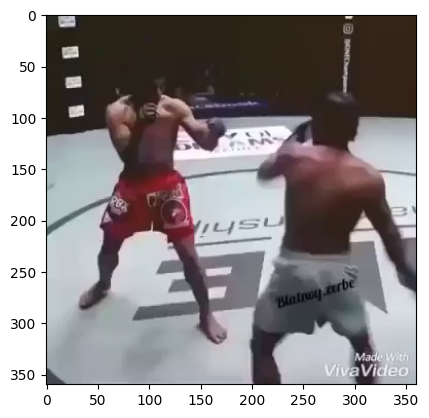

In [5]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
images =[files for files in os.listdir(violence_data)]
random_images = random.sample(images, 2)
plt.imshow(mpimg.imread(os.path.join(violence_data, random_images[0])))
plt.show()


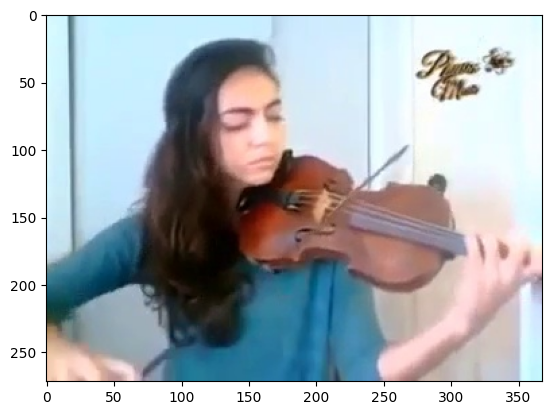

In [6]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
images =[files for files in os.listdir(non_violence_data)]
random_images = random.sample(images, 2)
plt.imshow(mpimg.imread(os.path.join(non_violence_data, random_images[0])))
plt.show()

In [7]:
import tensorflow as tf

physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [8]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import  Dropout, Dense, Flatten, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define paths
dataset_path = '/kaggle/input/real-life-violence-and-nonviolence-data/violence_dataset'
violence_data = os.path.join(dataset_path, 'violence')
non_violence_data = os.path.join(dataset_path, 'non_violence')

# Create directories for the split
output_dir = '/content/split_dataset'
train_dir = os.path.join(output_dir, 'train')
val_dir = os.path.join(output_dir, 'val')
test_dir = os.path.join(output_dir, 'test')

# Create subdirectories
os.makedirs(os.path.join(train_dir, 'Violence'), exist_ok=True)
os.makedirs(os.path.join(train_dir, 'Non Violence'), exist_ok=True)
os.makedirs(os.path.join(val_dir, 'Violence'), exist_ok=True)
os.makedirs(os.path.join(val_dir, 'Non Violence'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'Violence'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'Non Violence'), exist_ok=True)

# Load file names
violence_files = os.listdir(violence_data)
non_violence_files = os.listdir(non_violence_data)

# Split the data
def split_data(files, source_dir, train_dir, val_dir, test_dir, train_ratio=0.7, val_ratio=0.15):
    train_files, temp_files = train_test_split(files, train_size=train_ratio, random_state=42)
    val_files, test_files = train_test_split(temp_files, test_size=(1 - val_ratio / (1 - train_ratio)), random_state=42)

    # Copy files to train, val, and test directories
    for file in train_files:
        shutil.copy(os.path.join(source_dir, file), train_dir)
    for file in val_files:
        shutil.copy(os.path.join(source_dir, file), val_dir)
    for file in test_files:
        shutil.copy(os.path.join(source_dir, file), test_dir)

# Split and copy files
split_data(violence_files, violence_data,
           os.path.join(train_dir, 'Violence'),
           os.path.join(val_dir, 'Violence'),
           os.path.join(test_dir, 'Violence'))

split_data(non_violence_files, non_violence_data,
           os.path.join(train_dir, 'Non Violence'),
           os.path.join(val_dir, 'Non Violence'),
           os.path.join(test_dir, 'Non Violence'))

print("Data splitting completed!")

Data splitting completed!


In [10]:
import os

# List contents of the directories
print("Train directory contents:", os.listdir(train_dir))
print("Validation directory contents:", os.listdir(val_dir))
print("Test directory contents:", os.listdir(test_dir))

Train directory contents: ['Violence', 'Non Violence']
Validation directory contents: ['Violence', 'Non Violence']
Test directory contents: ['Violence', 'Non Violence']


In [11]:
print("Train - Violence contents:", os.listdir(os.path.join(train_dir, 'Violence')))
print("Train - Non Violence contents:", os.listdir(os.path.join(train_dir, 'Non Violence')))

Train - Violence contents: ['V_297.mp4_frame1.jpg', 'V_789.mp4_frame216.jpg', 'V_614.mp4_frame2.jpg', 'V_627.mp4_frame0.jpg', 'V_817.mp4_frame3.jpg', 'V_89.mp4_frame1.jpg', 'V_67.mp4_frame1.jpg', 'V_407.mp4_frame2.jpg', 'V_789.mp4_frame50.jpg', 'V_424.mp4_frame2.jpg', 'V_734.mp4_frame3.jpg', 'V_807.mp4_frame1.jpg', 'V_789.mp4_frame316.jpg', 'V_717.mp4_frame3.jpg', 'V_522.mp4_frame0.jpg', 'V_800.mp4_frame2.jpg', 'V_565.mp4_frame1.jpg', 'V_681.mp4_frame2.jpg', 'V_598.mp4_frame2.jpg', 'V_20.mp4_frame5.jpg', 'V_193.mp4_frame0.jpg', 'V_913.mp4_frame4.jpg', 'V_175.mp4_frame1.jpg', 'V_973.mp4_frame0.jpg', 'V_538.mp4_frame3.jpg', 'V_393.mp4_frame1.jpg', 'V_683.mp4_frame3.jpg', 'V_252.mp4_frame1.jpg', 'V_396.mp4_frame4.jpg', 'V_49.mp4_frame0.jpg', 'V_516.mp4_frame1.jpg', 'V_553.mp4_frame0.jpg', 'V_971.mp4_frame0.jpg', 'V_134.mp4_frame1.jpg', 'V_144.mp4_frame1.jpg', 'V_422.mp4_frame5.jpg', 'V_916.mp4_frame1.jpg', 'V_556.mp4_frame0.jpg', 'V_729.mp4_frame0.jpg', 'V_789.mp4_frame134.jpg', 'V_789.mp

In [12]:
import shutil
import os

# Define paths to the directories containing the checkpoints
checkpoint_dirs = [
    os.path.join(train_dir, '.ipynb_checkpoints'),
    os.path.join(val_dir, '.ipynb_checkpoints'),
    os.path.join(test_dir, '.ipynb_checkpoints')
]

# Remove checkpoint directories if they exist
for dir_path in checkpoint_dirs:
    if os.path.exists(dir_path):
        shutil.rmtree(dir_path)

# Verify that checkpoint directories are removed
print("Train directory contents:", os.listdir(train_dir))
print("Validation directory contents:", os.listdir(val_dir))
print("Test directory contents:", os.listdir(test_dir))

Train directory contents: ['Violence', 'Non Violence']
Validation directory contents: ['Violence', 'Non Violence']
Test directory contents: ['Violence', 'Non Violence']


In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ImageDataGenerator for preprocessing
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Load and preprocess validation data
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Load and preprocess test data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

print("Data preprocessing completed!")

Found 7743 images belonging to 2 classes.
Found 1658 images belonging to 2 classes.
Found 1662 images belonging to 2 classes.
Data preprocessing completed!


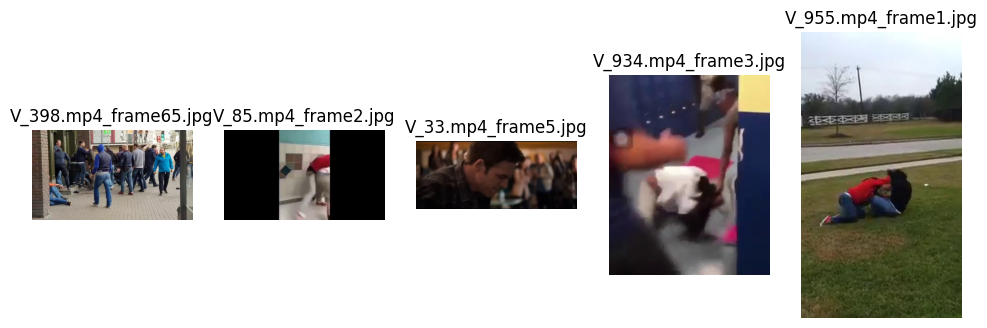

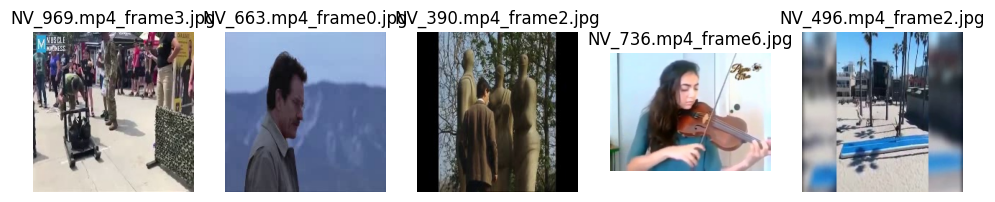

In [14]:
def plot_images_from_directory(directory, num_images=5):
    # Get a list of image files
    image_files = [f for f in os.listdir(directory) if f.endswith(('png', 'jpg', 'jpeg'))]

    # Select a few images to display
    selected_files = np.random.choice(image_files, num_images, replace=False)

    # Plot images
    plt.figure(figsize=(12, 8))

    for i, img_file in enumerate(selected_files):
        img_path = os.path.join(directory, img_file)
        img = mpimg.imread(img_path)

        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(img_file)

    plt.show()

# Example usage
plot_images_from_directory(os.path.join(train_dir, 'Violence'))
plot_images_from_directory(os.path.join(train_dir, 'Non Violence'))

In [15]:
#VGG-16 model without the top (Fully-Connected Layer)
vgg16_model = tf.keras.applications.vgg16.VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(224,224,3)))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [16]:
#Freezing all the VGG-16 model layers except last 4
for layer in vgg16_model.layers[:-4]:
    layer.trainable = False

In [17]:

# Load VGG-16 model with pre-trained weights, excluding the top fully connected layers
base_model = tf.keras.applications.vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom top layers for classification
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=x)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)

# Evaluate the model on the test set
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"Test accuracy: {test_acc:.2f}")

# Save the model
model.save('/content/vgg16_model.h5')

Epoch 1/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 66s 206ms/step - accuracy: 0.7933 - loss: 0.4132 - val_accuracy: 0.9295 - val_loss: 0.1832
Epoch 2/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 14s 57ms/step - accuracy: 1.0000 - loss: 0.0953 - val_accuracy: 0.9615 - val_loss: 0.1260
Epoch 3/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 44s 163ms/step - accuracy: 0.9601 - loss: 0.1236 - val_accuracy: 0.9387 - val_loss: 0.1532
Epoch 4/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9688 - loss: 0.1225 - val_accuracy: 0.9615 - val_loss: 0.0605
Epoch 5/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 38s 156ms/step - accuracy: 0.9862 - loss: 0.0652 - val_accuracy: 0.9522 - val_loss: 0.1285
Epoch 6/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - accuracy: 0.9688 - loss: 0.1273 - val_accuracy: 0.9231 - val_loss: 0.3084
Epoch 7/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 38s 157ms/step - accuracy: 0.9922 - loss: 0.0441 - val_accuracy: 0.9522 - val_loss: 0.1279
Epoch 8/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - accuracy: 0.9375 - loss: 0.0909

Test accuracy: 0.96


In [18]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam

# Load the model
model = load_model('/content/vgg16_model.h5')

# Compile the model (optional, required only if you want to train or evaluate further)
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

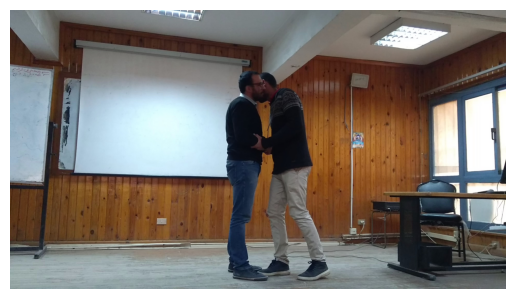

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted class: Non Violence
Confidence score: 0.00


In [19]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load the trained model
model = load_model('/content/vgg16_model.h5')

# Define class labels
class_labels = ['Non Violence', 'Violence']

def predict_image(img_path, model, class_labels):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Make prediction
    prediction = model.predict(img_array)

    # Interpret prediction
    class_index = (prediction > 0.5).astype('int32')[0][0]
    class_name = class_labels[class_index]

    return class_name, prediction[0][0]

def show_image(img_path):
    # Display the image
    img = plt.imread(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Path to the image you want to predict
img_path = '/content/split_dataset/test/Non Violence/NV_1.mp4_frame0.jpg'

# Show the image
show_image(img_path)

# Predict the class of the image
class_name, confidence = predict_image(img_path, model, class_labels)

print(f"Predicted class: {class_name}")
print(f"Confidence score: {confidence:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


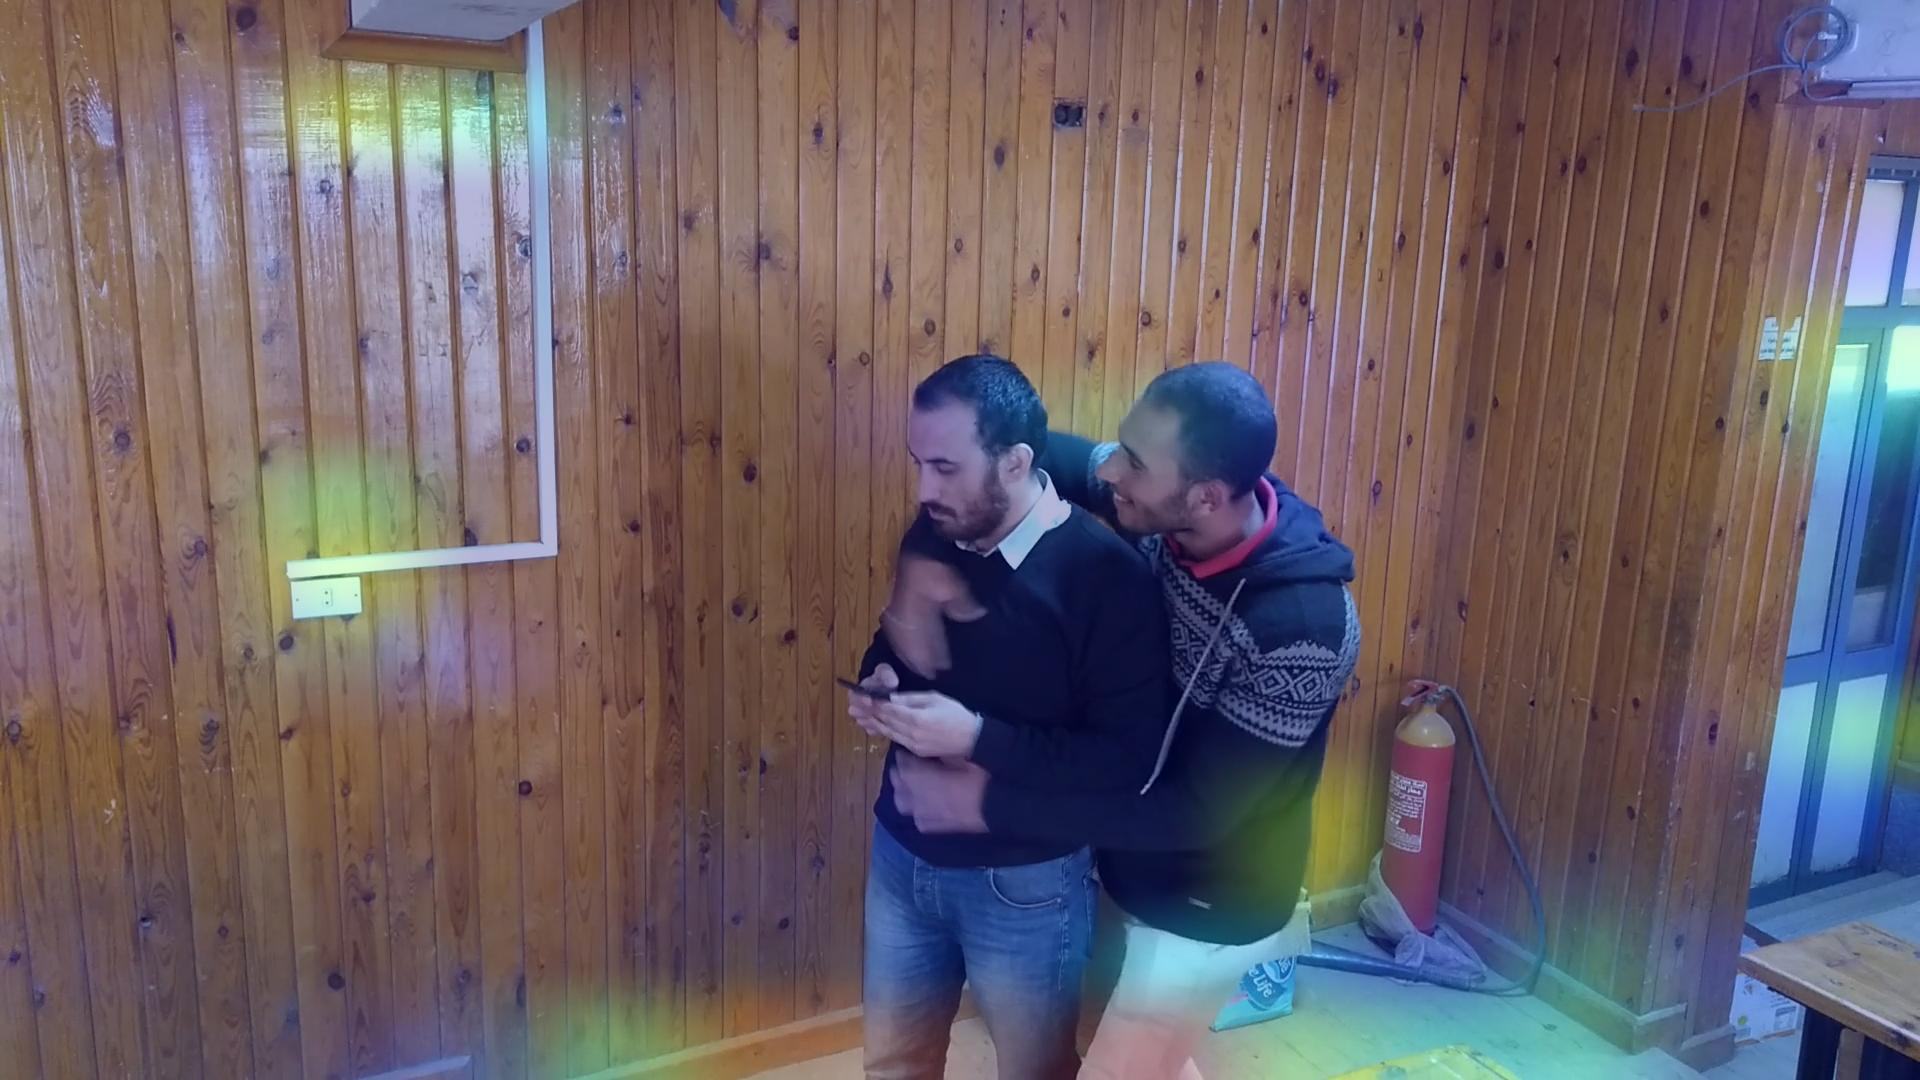

In [21]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import applications, models, preprocessing
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from IPython.display import Image, display
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

def get_img_array(img_path, size):
    # Load and preprocess the image
    img = preprocessing.image.load_img(img_path, target_size=size)
    img_array = preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = applications.vgg16.preprocess_input(img_array)  # Use VGG16 preprocessing
    return img_array

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # Create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Compute the gradient of the top predicted class for the input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # Calculate the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # Compute the mean intensity of the gradient over feature map channels
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiply each channel in the feature map array by its importance
    # and sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Normalize the heatmap between 0 and 1 for visualization
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)

    return heatmap.numpy()

def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = preprocessing.image.load_img(img_path)
    img = preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on the original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))

# Path to your image
img_path = '/content/split_dataset/train/Violence/V_1.mp4_frame2.jpg'

# Load the VGG16 base model with pre-trained weights
base_model = applications.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom top layers for classification
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=x)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Load the weights for the custom top layers
model.load_weights('/content/vgg16_model.h5')

# Specify the last convolutional layer name for VGG16
last_conv_layer_name = "block5_conv3"

# Prepare image
img_array = get_img_array(img_path, size=(224, 224))

# Generate class activation heatmap focusing on the violence class
# For binary classification, you can use the predicted class index directly
preds = model.predict(img_array)
pred_index = int(preds[0] > 0.5)  # Convert sigmoid output to binary class index
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=pred_index)

# Save and display Grad CAM
save_and_display_gradcam(img_path, heatmap)

In [24]:
# Check the shape of the predictions
print(preds.shape)

(1, 1)


In [29]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import applications, models, preprocessing
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from IPython.display import Image, display
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

def get_img_array(img_path, size):
    # Load and preprocess the image
    img = preprocessing.image.load_img(img_path, target_size=size)
    img_array = preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = applications.vgg16.preprocess_input(img_array)  # Use VGG16 preprocessing
    return img_array

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # Create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Compute the gradient of the top predicted class for the input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # Calculate the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # Compute the mean intensity of the gradient over feature map channels
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiply each channel in the feature map array by its importance
    # and sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Normalize the heatmap between 0 and 1 for visualization
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)

    return heatmap.numpy()

def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = preprocessing.image.load_img(img_path)
    img = preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on the original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))

# Path to your image
img_path = '/content/split_dataset/test/Violence/V_116.mp4_frame3.jpg'

# Load the VGG16 base model with pre-trained weights
base_model = applications.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom top layers for classification
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=x)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Load the weights for the custom top layers
model.load_weights('/content/vgg16_model.h5')

# Specify the last convolutional layer name for VGG16
last_conv_layer_name = "block5_conv3"

# Prepare image
img_array = get_img_array(img_path, size=(224, 224))

# Generate class activation heatmap focusing on the violence class
# For binary classification, you can use the predicted class index directly
preds = model.predict(img_array)
pred_index = int(preds[0] > 0.5)  # Convert sigmoid output to binary class index
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=pred_index)

# Save and display Grad CAM
save_and_display_gradcam(img_path, heatmap)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


InvalidArgumentError: {{function_node __wrapped__StridedSlice_device_/job:localhost/replica:0/task:0/device:GPU:0}} slice index 1 of dimension 1 out of bounds. [Op:StridedSlice] name: strided_slice/

In [31]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # Create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Compute the gradient of the top predicted class for the input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if isinstance(preds, list):
            preds = tf.convert_to_tensor(preds)
        preds = tf.convert_to_tensor(preds)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[0, pred_index]

    # Calculate the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # Compute the mean intensity of the gradient over feature map channels
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiply each channel in the feature map array by its importance
    # and sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = tf.reduce_mean(last_conv_layer_output * pooled_grads[..., tf.newaxis], axis=-1)

    # Normalize the heatmap between 0 and 1 for visualization
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)

    return heatmap.numpy()

def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras_image.load_img(img_path)
    img = keras_image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras_image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras_image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on the original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras_image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))